In [1]:
#Imports and preamble
#Carl Östling & Erik Gunnarsson
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load data for GDP and remove everything that isn't related to the year 2017
gdp = pd.read_csv("data/gdp-per-capita-worldbank.csv")
gdp_year_not_2017 = gdp[ gdp['Year'] != 2017]
gdp = gdp.drop(gdp_year_not_2017.index, axis=0)
gdp_no_country_code = gdp[ gdp["Code"].isnull()]
gdp = gdp.drop(gdp_no_country_code.index, axis=0)


In [3]:
# Load data for Life Expectancy and remove everything that isn't related to the year 2017
le = pd.read_csv("data/life-expectancy.csv")
le_year_not_2017 = le[ le['Year'] != 2017]
le = le.drop(le_year_not_2017.index, axis=0)




In [4]:
# Find countries with life expectancy one standard deviation above the mean (in 2017)
mean = le["Life expectancy (years)"].mean()
std = le["Life expectancy (years)"].std()
le_one_std_above_mean = le[le["Life expectancy (years)"] > mean+std]



In [5]:
# Merge GDP with LE
le_gdp = pd.merge(left=gdp, right=le, left_on=["Year", "Code", "Entity"], right_on=["Year", "Code", "Entity"])


In [6]:
# Find countries with high GDP and low Life Expectancy
# As "high" is subjective, we'll here define it has being above mean. "Low" is defined in the opposite manner. 

gdp_mean = le_gdp["GDP per capita (int.-$) (constant 2011 international $)"].mean()
le_mean = le_gdp["Life expectancy (years)"].mean()
gdp_std = le_gdp["GDP per capita (int.-$) (constant 2011 international $)"].std()

countries_with_low_gdp_high_le = le_gdp.loc[(le_gdp["GDP per capita (int.-$) (constant 2011 international $)"] < gdp_mean)
    & (le_gdp["Life expectancy (years)"] > le_mean)]
    


In [7]:
# Find countries with high GDP and low life expectancy
countries_with_high_gdp_low_le = le_gdp.loc[(le_gdp["GDP per capita (int.-$) (constant 2011 international $)"] > gdp_mean+(gdp_std))
     & (le_gdp["Life expectancy (years)"] < le_mean)]


<function matplotlib.pyplot.close(fig=None)>

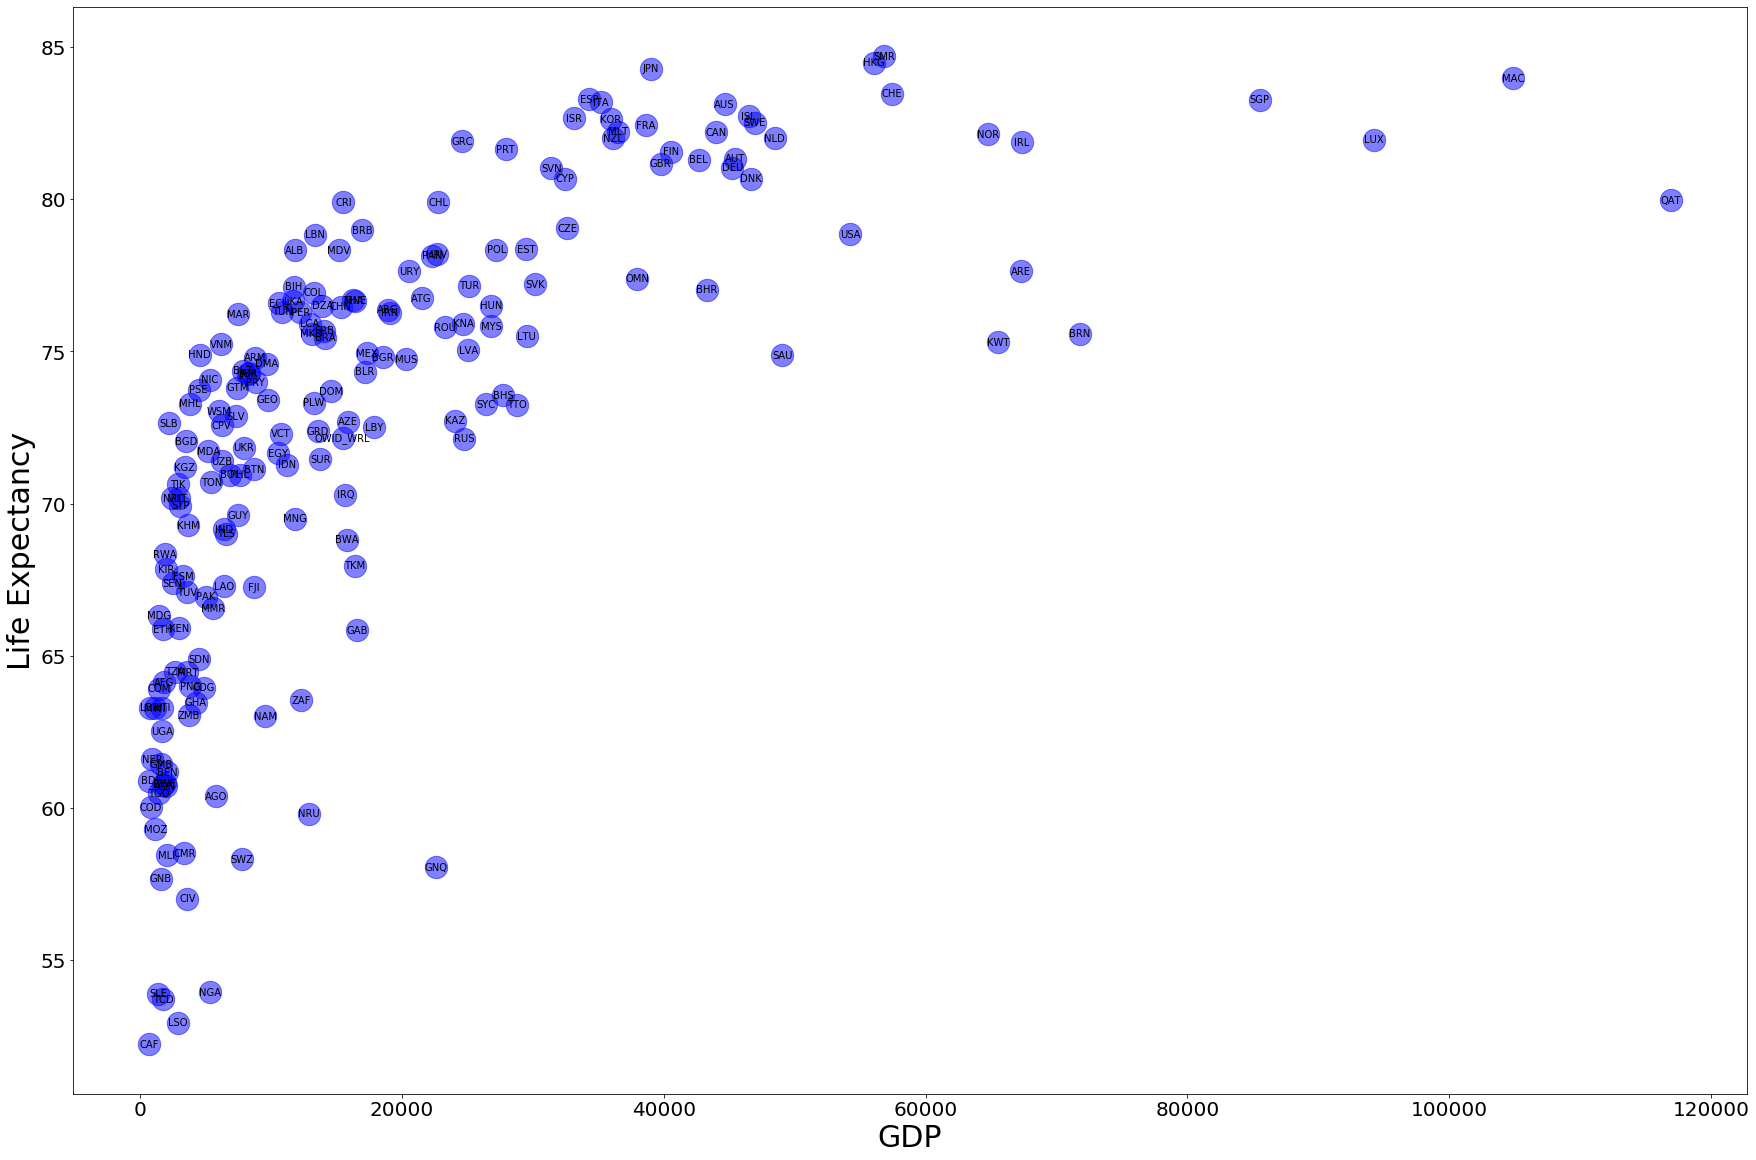

In [8]:
#Make the plot
x = le_gdp["GDP per capita (int.-$) (constant 2011 international $)"]
y = le_gdp["Life expectancy (years)"]

plt.figure(figsize=(30,20))
plt.scatter(x, y, s=500, color="b", alpha=0.5)
plt.xlabel("GDP",fontsize=30)
plt.ylabel("Life Expectancy", fontsize=30)
plt.tick_params(axis="both",which="major",labelsize=20)

#Puts the country code on the points, this for loop takes some time to run
for i, code in enumerate(le_gdp["Code"]):
    plt.annotate(code, (x[i], y[i]), fontsize=10, ha="center", va="center")

plt.show
plt.close

In [9]:
# Load data for PISA Test scores and remove everything that isn't related to the year 2016
PISA = pd.read_csv("data/pisa-test-score-mean-performance-on-the-science-scale.csv")
PISA_year_not_2015 = PISA[ PISA['Year'] != 2015]
PISA = PISA.drop(PISA_year_not_2015.index, axis=0)

In [10]:
# Load data for internet usage and remove everything that isn't related to the year 2016
internet = pd.read_csv("data/share-of-individuals-using-the-internet.csv")
internet_year_not_2015 = internet[ internet['Year'] != 2015]
internet = internet.drop(internet_year_not_2015.index, axis=0)
# Merge internet with PISA

internet_PISA = pd.merge(left=internet, right=PISA, left_on=["Year", "Code", "Entity"], right_on=["Year", "Code", "Entity"])
#print(internet_PISA)

0     63.252933
1     38.200000
2     68.043064
3     84.560519
4     83.940142
        ...    
65    90.500000
66    92.000300
67    74.554202
68    64.600000
69    43.500000
Name: Individuals using the Internet, Length: 70, dtype: float64 0     427.2250
1     375.7451
2     432.2262
3     509.9939
4     495.0375
        ...   
65    436.7311
66    509.2215
67    496.2424
68    435.3630
69    524.6445
Name: PISA: Mean performance on the science scale, Length: 70, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

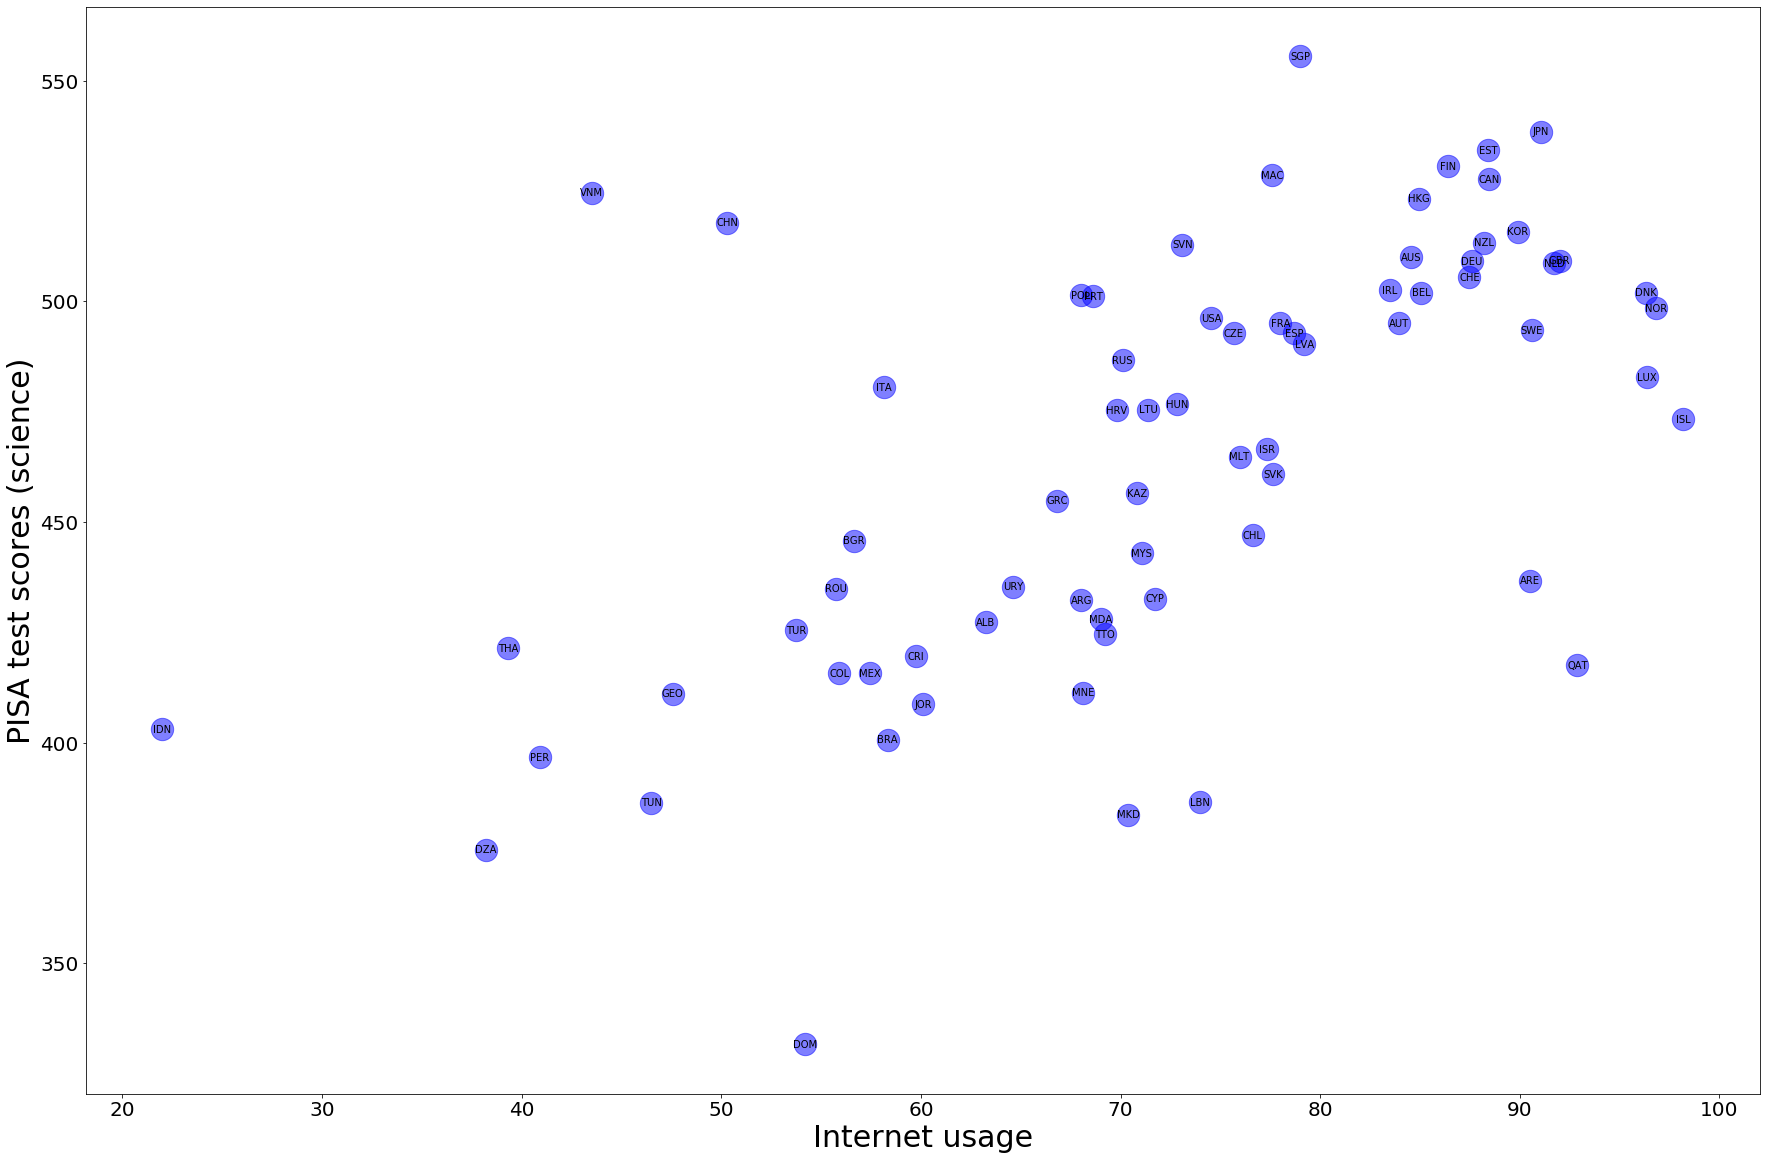

In [11]:
# Make the plot
x = internet_PISA["Individuals using the Internet"]
y = internet_PISA["PISA: Mean performance on the science scale"]
print(x,y)
plt.figure(figsize=(30,20))
plt.scatter(x, y, s=500, color="b", alpha=0.5)
plt.xlabel("Internet usage", fontsize=30)
plt.ylabel("PISA test scores (science)", fontsize=30)
plt.tick_params(axis="both", which="major", labelsize=20)

# Puts the country code on the points, this for loop takes some time to run
for i, code in enumerate(internet_PISA["Code"]):
    plt.annotate(code,(x[i],y[i]), fontsize=10, ha="center", va="center")

plt.show